In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import random
import pandas as pd

In [3]:
import seaborn as sns

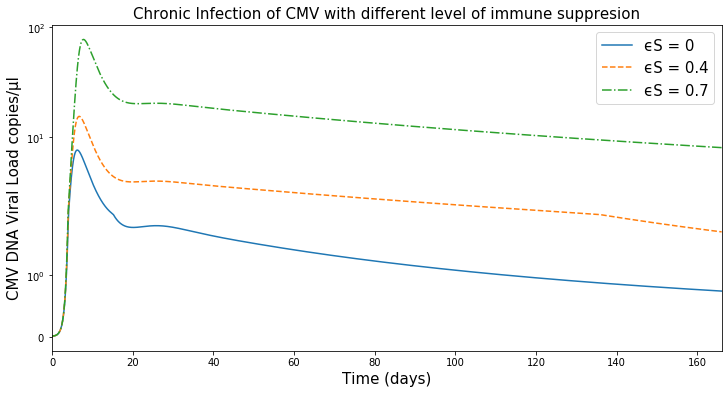

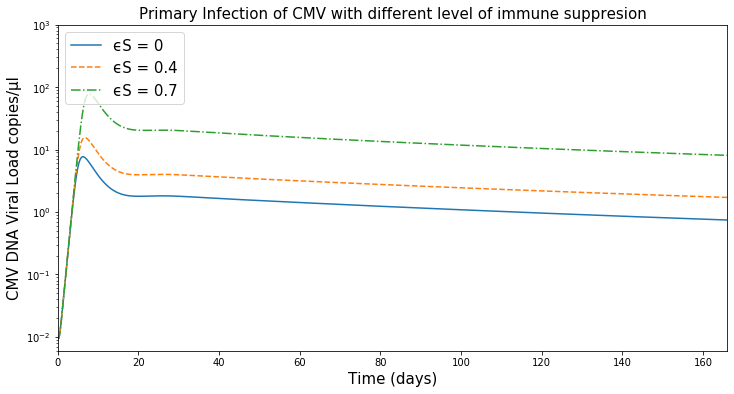

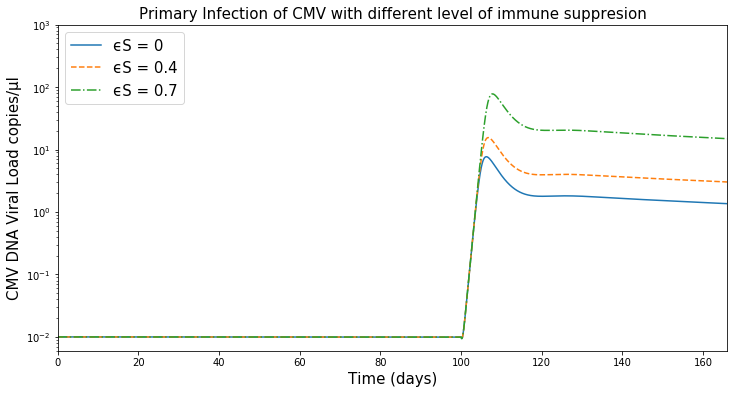

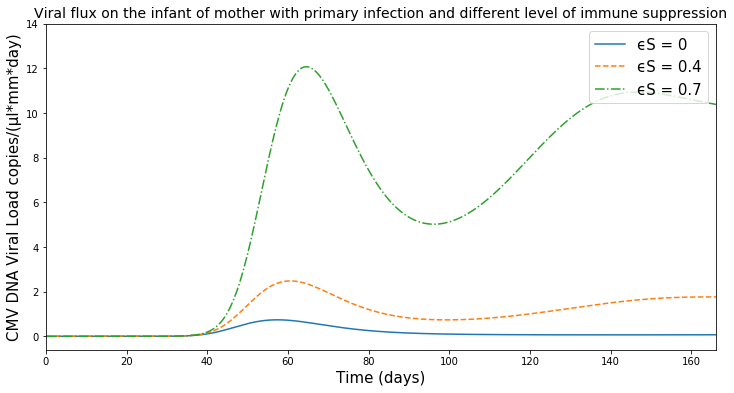

In [4]:
%run CMV_Model.ipynb

The goal of this function is to implement Lewis' Thinning Algorithm -- generation of arrival events from an inhomogeneous Poisson Process. Suppose the time-varying rate is given by an intensity function $\lambda(t)$ which can be input into our function through an array of tumples Lambda = [(lambda1, t1), (lambda2, t2),...], representing the discrete values $\lambda(t_i)$ for intensity evluated at times $t_1,t_2,...$. T denotes the maximum time we consider for the Poinsson Process. 

In [5]:
pde_result=pd.read_csv(r'C:\Users\pc\Documents\school\Placental-Transmission-main\34795\viral.csv')

In [6]:
Simulation=pd.read_csv(r'C:\Users\pc\Documents\school\Placental-Transmission-main\simulation.csv')

In [7]:
exp_result=pd.read_csv(r'C:\Users\pc\Documents\school\Placental-Transmission-main\plasma data.csv')

In [172]:
exp=exp_result[exp_result['PC']=='PC-intact']

In [174]:
plot_range=[[1,2,3,4,5],[6,7,8],[9,10,11,12,13,14],[15,16,17],[18,19,20],[21,22,23,24,25,26]]

In [179]:
animal_data=pd.read_csv('animal_data_cleared.csv')

(-45.85, 250)

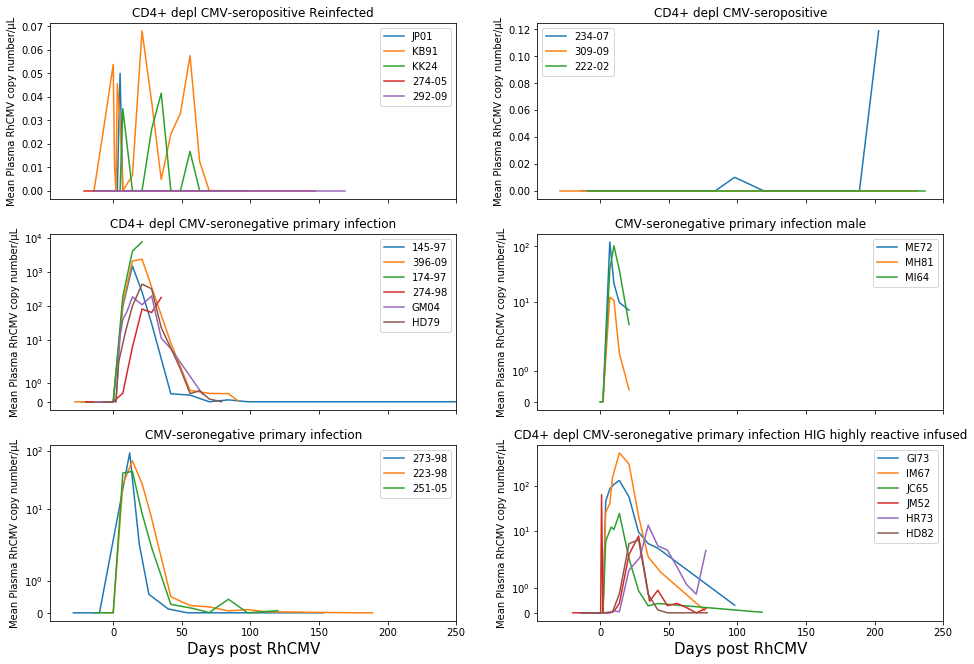

In [180]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16,11))
#fig.suptitle('3 rows x 4 columns axes with no data')
for i in plot_range[0]:
    sns.lineplot(ax=axes[0,0],data=animal_data,x='Days post RhCMV',y=animal_data.columns[i],label=animal_data.columns[i].split(" ", 1)[0])
axes[0,0].set_title(animal_data.columns[i].split(" ", 1)[1][1:-1])
axes[0,0].set_ylabel('Mean Plasma RhCMV copy number/μL',fontsize=10)
for i in plot_range[1]:
    sns.lineplot(ax=axes[0,1],data=animal_data,x='Days post RhCMV',y=animal_data.columns[i],label=animal_data.columns[i].split(" ", 1)[0])
axes[0,1].set_title(animal_data.columns[i].split(" ", 1)[1][1:-1])
axes[0,1].set_ylabel('Mean Plasma RhCMV copy number/μL',fontsize=10)
for i in plot_range[2]:
    sns.lineplot(ax=axes[1,0],data=animal_data,x='Days post RhCMV',y=animal_data.columns[i],label=animal_data.columns[i].split(" ", 1)[0])
axes[1,0].set_title(animal_data.columns[i].split(" ", 1)[1][1:-1])
axes[1,0].set_ylabel('Mean Plasma RhCMV copy number/μL',fontsize=10)
axes[1,0].set_yscale('symlog')
for i in plot_range[3]:
    sns.lineplot(ax=axes[1,1],data=animal_data,x='Days post RhCMV',y=animal_data.columns[i],label=animal_data.columns[i].split(" ", 1)[0])
axes[1,1].set_title(animal_data.columns[i].split(" ", 1)[1][0:-1]+' male')
axes[1,1].set_ylabel('Mean Plasma RhCMV copy number/μL',fontsize=10)
axes[1,1].set_yscale('symlog')
for i in plot_range[4]:
    sns.lineplot(ax=axes[2,0],data=animal_data,x='Days post RhCMV',y=animal_data.columns[i],label=animal_data.columns[i].split(" ", 1)[0])
axes[2,0].set_title(animal_data.columns[i].split(" ", 1)[1][0:-1])
axes[2,0].set_ylabel('Mean Plasma RhCMV copy number/μL',fontsize=10)
axes[2,0].set_yscale('symlog')
for i in plot_range[5]:
    sns.lineplot(ax=axes[2,1],data=animal_data,x='Days post RhCMV',y=animal_data.columns[i],label=animal_data.columns[i].split(" ", 1)[0])
axes[2,1].set_title(animal_data.columns[i].split(" ", 1)[1][1:-1])
axes[2,1].set_ylabel('Mean Plasma RhCMV copy number/μL',fontsize=10)
axes[2,1].set_yscale('symlog')
axes[2,1].set_xlim(xmax=250)

#plt.savefig('Mean Plasma RhCMV.png')

In [181]:
#parameters for cd4 depl
ρ = 1
n = 4e1
δ = 4e-1
c = 2e-1
k = 3e-4
m = 1e-1
α0 = 2e-1
κ = 5e-3
λE = 4e-2
λ = 1e-3
e = 9
ϵS = 0
f = 1
rS = 4e2
rL = 4e-2
tH = 2
tD = 1
Estar = 10
Vstar = 1e-2

y0 = [1e-2, 0, 0, 5e2, 0]
ts = np.linspace(0,1000, 100000)
ϵS = 0.99
ys2 = odeint(m1, y0, ts)

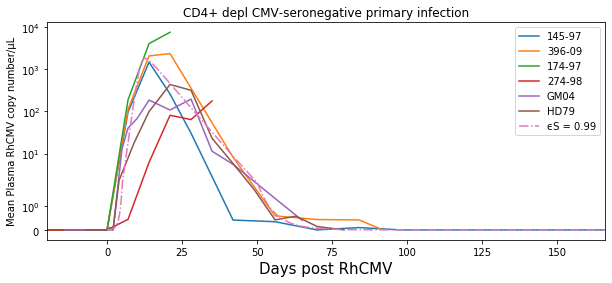

In [182]:
fig2, ax2 = plt.subplots( figsize=(10,4))
for i in plot_range[2]:
    sns.lineplot(ax=ax2,data=animal_data,x='Days post RhCMV',y=animal_data.columns[i],label=animal_data.columns[i].split(" ", 1)[0])
ax2.plot(ts, ys2[:, 0], '-.', label="ϵS = 0.99")
ax2.set_title(animal_data.columns[i].split(" ", 1)[1][1:-1])
ax2.set_ylabel('Mean Plasma RhCMV copy number/μL',fontsize=10)
ax2.set_yscale('symlog')
ax2.set_xlim(xmin=-20,xmax=166)
ax2.legend()
plt.savefig(animal_data.columns[i].split(" ", 1)[1][1:-1]+' with ode.png')

In [149]:
#parameters for cd4 depl
ρ = 2
n = 4e1
δ = 4e-1
c = 2e-1
k = 3e-4
m = 1e-1
α0 = 2e-1
κ = 5e-3
λE = 4e-2
λ = 1e-3
e = 9
ϵS = 0
f = 1
rS = 4e2
rL = 4e-2
tH = 2
tD = 1
Estar = 10
Vstar = 1e-2

y0 = [1e-2, 0, 0, 9e2, 0]
ϵS = 0
ys0 = odeint(m1, y0, ts)

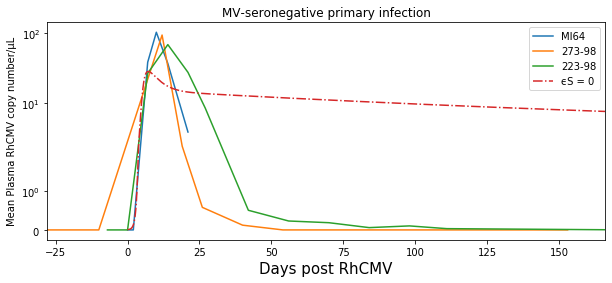

In [150]:
fig3, ax3 = plt.subplots( figsize=(10,4))
for i in plot_range[4]:
    sns.lineplot(ax=ax3,data=animal_data,x='Days post RhCMV',y=animal_data.columns[i],label=animal_data.columns[i].split(" ", 1)[0])
ax3.plot(ts, ys0[:, 0], '-.', label="ϵS = 0")
ax3.set_title(animal_data.columns[i].split(" ", 1)[1][1:-1])
ax3.set_ylabel('Mean Plasma RhCMV copy number/μL',fontsize=10)
ax3.set_yscale('symlog')
ax3.set_xlim(xmin=-28,xmax=166)
ax3.legend()

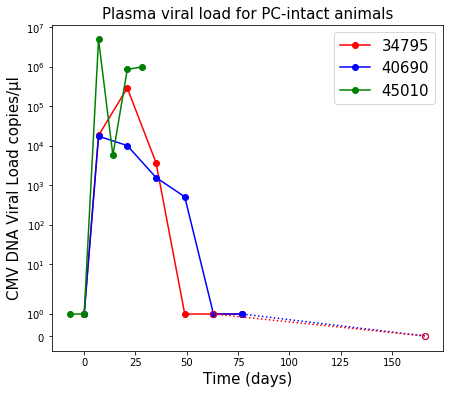

In [151]:



plt.figure(figsize=(7,6))
plt.plot(exp[exp['Animal ID']==34795]['days'].values,exp[exp['Animal ID']==34795]['viral load'].values,'o-', color='red',label="34795")
plt.plot([exp[exp['Animal ID']==34795]['days'].values[-2], 166],[exp[exp['Animal ID']==34795]['viral load'].values[-2],0],'o:',fillstyle='none', color="blue")
plt.plot(exp[exp['Animal ID']==40690]['days'].values,exp[exp['Animal ID']==40690]['viral load'].values,'o-', color='blue', label="40690")
plt.plot([exp[exp['Animal ID']==40690]['days'].values[-2], 166],[exp[exp['Animal ID']==40690]['viral load'].values[-2],0],'o:',fillstyle='none', color="red")
plt.plot(exp[exp['Animal ID']==45010]['days'].values,exp[exp['Animal ID']==45010]['viral load'].values,'o-', color='green',label="45010")


plt.yscale('symlog')
plt.xlabel('Time (days)',fontsize=15)
plt.ylabel('CMV DNA Viral Load copies/μl',fontsize=15)

plt.legend(fontsize=15,loc=1)
plt.title('Plasma viral load for PC-intact animals',fontsize=15)
plt.show()

In [152]:
exp[exp['Animal ID']==34795][['days','viral load']].dropna()

,days,viral load
1,0.0,1.00
2,7.0,18392.53
3,21.0,291826.00
4,35.0,3776.00
5,49.0,1.00
6,63.0,1.00
7,77.0,1.00


In [153]:
pde=pd.read_csv(r'C:\Users\pc\Desktop\0.csv')

In [154]:
monkey34795=exp[exp['Animal ID']==34795][['days','viral load']].dropna()

In [155]:
placenta_growth=10000/(1+ np.exp(-(0.05*(Simulation['time'].values-80))));

In [156]:
monkey40690=exp[exp['Animal ID']==40690][['days','viral load']].dropna()

In [157]:
monkey45010=exp[exp['Animal ID']==45010][['days','viral load']].dropna()

In [158]:
Simulation

,time,healthy,0.4,0.7,healthy_2,0.4_2,0.7_2,healthy_3,0.4_3,0.7_3
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.166166,5.150000e-90,1.330000e-89,6.960000e-90,9.580000e-90,9.580000e-90,9.580000e-90,9.580000e-90,9.580000e-90,9.580000e-90
2,0.332332,3.570000e-64,5.260000e-62,8.520000e-68,6.880000e-62,6.880000e-62,6.880000e-62,6.880000e-62,6.880000e-62,6.880000e-62
3,0.498498,1.120000e-48,3.100000e-54,1.390000e-52,8.940000e-46,8.940000e-46,8.940000e-46,8.940000e-46,8.940000e-46,8.940000e-46
4,0.664665,7.210000e-41,2.830000e-49,3.910000e-48,2.990000e-42,2.990000e-42,2.990000e-42,2.990000e-42,2.990000e-42,2.990000e-42
...,...,...,...,...,...,...,...,...,...,...
995,165.335335,2.504405e-01,6.439223e+00,3.866718e+01,4.062326e-01,3.683076e+00,2.718313e+01,8.048654e+00,2.825613e+01,1.333690e+02
996,165.501501,2.505769e-01,6.440226e+00,3.864679e+01,4.039424e-01,3.683951e+00,2.722890e+01,7.975439e+00,2.807709e+01,1.330490e+02
997,165.667668,2.507142e-01,6.441154e+00,3.862643e+01,4.016848e-01,3.685004e+00,2.727592e+01,7.902057e+00,2.789560e+01,1.327061e+02
998,165.833834,2.508523e-01,6.442007e+00,3.860612e+01,3.994592e-01,3.686251e+00,2.732418e+01,7.828550e+00,2.771188e+01,1.323409e+02


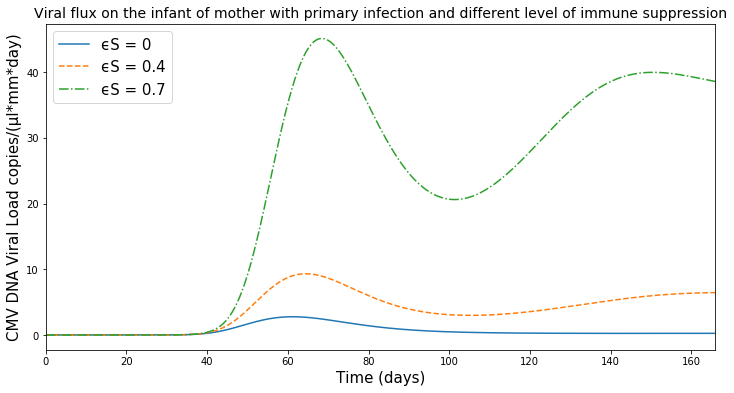

In [159]:
plt.figure(figsize=(12,6))
plt.plot(Simulation['time'],Simulation['healthy']   ,'-', label="ϵS = 0")
plt.plot(Simulation['time'],Simulation['0.4']   ,'--', label="ϵS = 0.4")
plt.plot(Simulation['time'],Simulation['0.7']   ,'-.', label="ϵS = 0.7")
plt.xlabel('Time (days)',fontsize=15)
plt.title('Viral flux on the infant of mother with primary infection and different level of immune suppression',fontsize=14)
plt.ylabel('CMV DNA Viral Load copies/(μl*mm*day)',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.show()

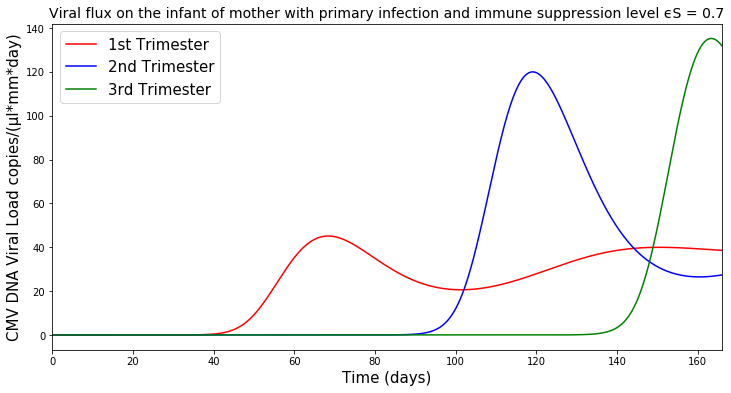

In [160]:
plt.figure(figsize=(12,6))
plt.plot(Simulation['time'],Simulation['0.7']   ,'r', label="1st Trimester")
plt.plot(Simulation['time'],Simulation['0.7_2']   ,'b', label="2nd Trimester")
plt.plot(Simulation['time'],Simulation['0.7_3']   ,'g', label="3rd Trimester")
plt.xlabel('Time (days)',fontsize=15)
plt.title('Viral flux on the infant of mother with primary infection and immune suppression level ϵS = 0.7',fontsize=14)
plt.ylabel('CMV DNA Viral Load copies/(μl*mm*day)',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.show()

In [25]:
cumulative=[]
for i in range(len(Simulation['time'])):
    cumulative.append(np.trapz(Simulation['healthy'][:i],Simulation['time'][:i]))

In [41]:
def cumulative_prob(flux,time,prob):
    cumulative=[]
    for i in range(len(flux)):
        cumulative.append(np.trapz(flux[:i],time[:i]))
    return 1-np.power(1-0.00046,cumulative)

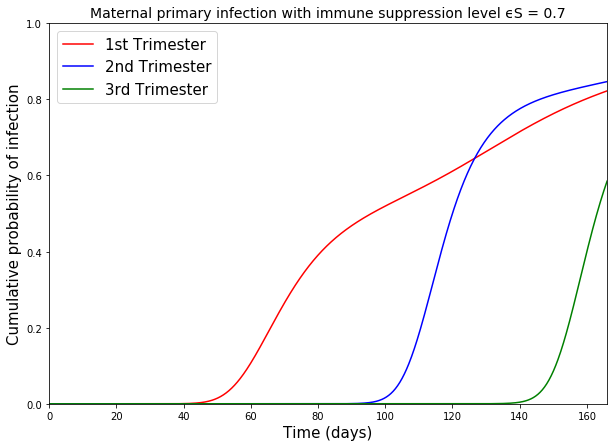

In [61]:
plt.figure(figsize=(10,7))
plt.plot(Simulation['time'],cumulative_prob(Simulation['0.7'],Simulation['time'],0.00046)  ,'r', label="1st Trimester")
plt.plot(Simulation['time'],cumulative_prob(Simulation['0.7_2'],Simulation['time'],0.00046)   ,'b', label="2nd Trimester")
plt.plot(Simulation['time'],cumulative_prob(Simulation['0.7_3'],Simulation['time'],0.00046)  ,'g', label="3rd Trimester")
plt.xlabel('Time (days)',fontsize=15)
plt.title('Maternal primary infection with immune suppression level ϵS = 0.7',fontsize=14)
plt.ylabel('Cumulative probability of infection',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)
plt.ylim(ymax=1,ymin=0)
plt.savefig(r'C:\Users\pc\Desktop\cmv\Maternal primary infection with immune suppression level ϵS = 0.7.png')
plt.show()

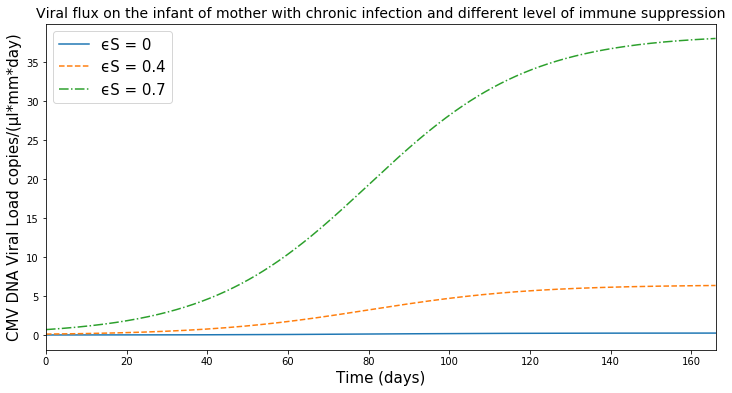

In [48]:
plt.figure(figsize=(12,6))
plt.plot(Simulation['time'],[2.509912e-01/10000] *len(Simulation['time'] ) *placenta_growth,'-', label="ϵS = 0")
plt.plot(Simulation['time'],[6.442784e+00/10000] *len(Simulation['time'])*placenta_growth,'--', label="ϵS = 0.4")
plt.plot(Simulation['time'],[3.858584e+01/10000] *len(Simulation['time'] )*placenta_growth,'-.', label="ϵS = 0.7")
#plt.yscale('symlog')
plt.xlabel('Time (days)',fontsize=15)
plt.title('Viral flux on the infant of mother with chronic infection and different level of immune suppression',fontsize=14)
plt.ylabel('CMV DNA Viral Load copies/(μl*mm*day)',fontsize=15)
plt.xlim(xmin=0,xmax=166)
plt.legend(fontsize=15,loc=2)
plt.rc('axes', labelsize=15)

plt.show()

In [87]:
# reshape toy data 
Lambda = list(zip(monkey45010['days'],monkey45010['viral load']))

In [86]:
monkey45010

,days,viral load
22,-7.0,0.1000
23,0.0,0.1000
24,7.0,4944.6670
25,14.0,5.7738
26,21.0,866.1168
27,28.0,990.1892


In [11]:
def sample_from_exponential_dist(a):
    # random sampling from exponential distribution with mean a
    # we will use inverse sampling 
    u = random.random()
    x = (1/a) * math.log(1/(1-u))
    return x


In [12]:
def inhomogeneousPoisson(Lambda, T):
    '''
    First, we aim to generate an array arrival_times[] representing the arrival time from an homogeneous Poisson Process with 
    fixed rate lambda_max up to time T; meanwhile, we also generate samples from uniform distribution on [0,1] which will decide
    whether these arrival times from homogeneous Poisson Process will be accepted as sample of the inhomogeneous Poisson Process
    '''
    lambda_max = max(Lambda[i][1] for i in range(len(Lambda)))
    
    arrival_times = [0]
    unif_samples = []
    while arrival_times[-1] <= T:
        arrival_times.append(arrival_times[-1]+sample_from_exponential_dist(lambda_max))
        unif_samples.append(random.random())
        
    # take out the first dummy time 0 and the last time which exceeds maximum time T     
    arrival_times = arrival_times[1:-1]
    
    # check if we accept each arrival time in arrival_times[]
    accepted_arrival_times = []
    for i in range(len(arrival_times)):
        # find the rate lambda[t] at the proposed arrival time
        for j in range(len(Lambda)):
            if Lambda[j][0] > arrival_times[i]:
                break
        acceptance_probability = Lambda[j][1]/lambda_max
        if acceptance_probability > unif_samples[i]:
            accepted_arrival_times.append(arrival_times[i])
    
    return accepted_arrival_times

## Plot: Single Experiment

Red cross denotes the time when arrival happens. Blue curve is the given intensity function $\lambda(t)$

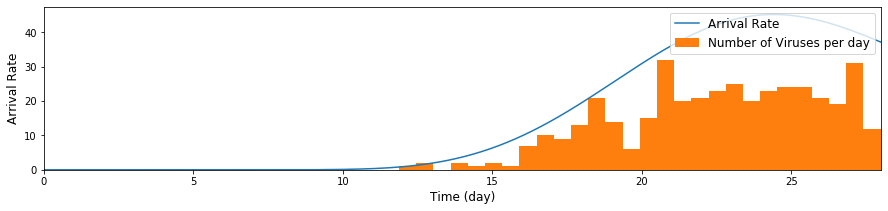

In [52]:
fig, ax = plt.subplots(figsize=(15,3))
T=28;
ax.plot(monkey45010['time'],monkey45010['viral flux'],label="Arrival Rate")
arrival_times = inhomogeneousPoisson(Lambda, T)
#ax.scatter(arrival_times, [0.0001]*len(arrival_times), marker='X',c='r',label="Arrival time")
ax.hist(arrival_times, bins=T, label='Number of Viruses per day')
plt.xlabel("Time (day)",fontsize=12)
plt.ylabel("Arrival Rate",fontsize=12)
plt.legend(fontsize=12,loc=1)
plt.xlim(xmin=0,xmax=T)
plt.show()



In [53]:
len(arrival_times)

399

In [151]:
arrival_times = inhomogeneousPoisson(Lambda, 280)

In [152]:
len(arrival_times)

299

In [153]:
class CMVsystem:

    def __init__(self, lam, mu, beta, alpha, delta,S0,p,c, S, L, I, V, ratio,virus_entry):
        self.lam = lam
        self.mu = mu
        self.beta = beta
        self.alpha = alpha
        self.delta=delta
        self.p = p
        self.c = c
        self.S0= S0
        self.t = 0.
        self.S = S
        self.L = L
        self.I = I
        self.V = V
        self.virus_entry=virus_entry
        self.ratio=ratio
        self.trajectory = np.array([[self.S, self.L, self.I,self.V]],dtype=float)
        self.times = None
            
#Define an initializer (__init__(self,beta,gamma,S,I,R)) which accepts model parameters beta and gamma, 
#and initial numbers of hosts in each of the S,I and R compartments.
    def reset(self, S, I, L, V,t=0.):
        self.t = t
        self.S = S
        self.L = L
        self.I = I
        self.V = V
        self.trajectory = np.array([[self.S, self.L, self.I, self.V]],dtype=float)

In [154]:
class StochasticCMVsystem (CMVsystem):

    """Define a specialized subclass of the general SIRsystem for modeling SIR dynamics as a stochastic, continuous
    time process, using the Gillespie method of continuous time Monte Carlo"""

    def step(self):
        """Implement one step of Gillespie's Direct Method based on current reaction rates: identify a reaction to fire
        next, as well as a time at which it will fire, and execute that reaction (similar to as was described in the
        StochasticCells exercise)."""
        
        #if no virus inside the system, wait till the first virus enters the system
        if self.V + self.I + self.L == 0:
            if self.virus_entry:
                self.t = virus_entry.pop()
                self.V = 1
            else:
                return None, self.t
        
            
        
        
        s = np.random.uniform(0,1)
        transition = None
        S_birth = self.lam
        S_death = self.mu*self.S
        inf_rate = self.beta*self.V*self.S/self.S0
        L_to_I = self.alpha*self.L
        #L_death = self.mu*self.L
        I_death = self.delta*self.I
        V_production = self.p*self.I
        V_death = self.c*self.V
        
        
        #S is kept constant
        #CASE1:with latent cells
        
        if s > self.ratio:
            rates=[inf_rate,L_to_I,I_death,V_production,V_death]
            total_rate=np.sum(rates)
            if total_rate == 0.:
                dt=0
            else:
                dt = np.random.exponential(1./total_rate, 1)[0]
            
            if self.virus_entry and self.t+dt > self.virus_entry[-1]:
                #print(self.t , self.virus_entry[-1])
                #recation does not happen, virus entry happens(case 1)
                self.V += 1
                self.t = self.virus_entry.pop()
                transition = 0
                
            else:
                #reaction happens
                if total_rate == 0.:
                    return transition, self.t
                if self.V+self.I+self.L == 0:
                    return transition, self.t
                if self.V+self.I+self.L == 1000:
                    return transition, self.t
                ranno = np.random.random()
                if ranno < np.sum(rates[0:1])/total_rate:
                    self.L += 1   #Latent cell production
                    transition = 1
                elif ranno < np.sum(rates[0:2])/total_rate:
                    self.I+=1     #Latent cell become infected
                    self.L-=1
                    transition = 2
                elif ranno < np.sum(rates[0:4])/total_rate:
                    self.I-=1      #Infected Cell death
                    transition = 3
                elif ranno < np.sum(rates[0:5])/total_rate:
                    self.V+=1      #virus creation
                    transition = 4
                elif ranno < np.sum(rates[0:6])/total_rate:
                    self.V-=1     #virus death
                    transition = 5
                    
                self.t += dt
                

        if s <= self.ratio:
            
            rates=[inf_rate,I_death,V_production,V_death]
            total_rate=np.sum(rates)
            if total_rate == 0.:
                dt=0
            else:
                dt = np.random.exponential(1./total_rate, 1)[0]
                

            if self.virus_entry and self.t+dt > self.virus_entry[-1]:
                #recation does not happen, virus entry happens
                self.V += 1
                self.t = self.virus_entry.pop()
                transition = 0
                
            else:
                #reaction happens

                if total_rate == 0.:
                    return transition, self.t
                if self.V + self.I==0:
                    return transition, self.t
                if self.V + self.I==1000:
                    return transition, self.t

                ranno = np.random.random()

                if ranno < np.sum(rates[0:1])/total_rate:
                    self.I += 1
                    transition = 1

                elif ranno < np.sum(rates[0:2])/total_rate:
                    self.I -= 1
                    transition = 2
                elif ranno < np.sum(rates[0:3])/total_rate:
                    self.V+=1
                    transition = 3
                elif ranno < np.sum(rates[0:4])/total_rate:
                    self.V-=1
                    transition = 4
                self.t += dt
                
                
                
        #dt = np.random.exponential(1./total_rate, 1)[0]
        #why 1/the hazard function? different from the textbook
        #print(transition, self.t)
        return transition, self.t

            
            
    def run(self, T = None, make_traj=True):
        """Run the Gillespie algorithm for stochastic simulation from time 0 to at least time T, starting with the initial
        values stored in the S,I,R state variables; story the result in self.trajectory if make_traj argument is
        set to True"""

        if T is None:
            T = sys.maxsize
        self.times = [0.]

        transition = 1
        while self.t < T:
            transition, t = self.step()
            if transition == None:
                return self.t
            if make_traj:
                self.trajectory = np.concatenate((self.trajectory, [[self.S,self.L,self.I,self.V]]), axis=0)
            self.times.append(self.t)
        return self.t

In [155]:
count=0;

In [164]:
for _ in range(100):
    virus_entry=arrival_times[::-1]

    mu=1/4.5; beta=0.0012; alpha=1; delta=0.77; S0=400;lam=mu*S0 ;p=1600;c=1.5; S=S0; L=0; I=0; V=0;ratio=0.5;
    M1 = StochasticCMVsystem(lam, mu, beta, alpha, delta, S0, p, c, S, L, I, V,ratio,virus_entry);

    M1.run(280)
    if M1.trajectory[-1,3]>1000:
        count+=1

    



In [165]:
count

0

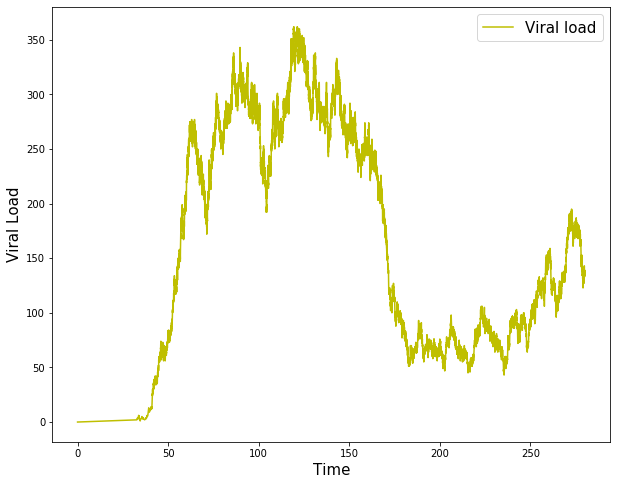

In [166]:
#plt.plot(M1.times[:-1], M1.trajectory[:-1,0], 'b-', label='S')
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(M1.times[:-1], M1.trajectory[:-1,3], 'y-', label='Viral load')

#plt.plot(M1.times[:-1], M1.trajectory[:-1,1], 'r-', label='Latent cells')
#plt.plot(M1.times[:-1], M1.trajectory[:-1,2], 'g-', label='Infected cells')
#plt.yscale("symlog")
plt.xlabel("Time",fontsize=15)
plt.ylabel("Viral Load",fontsize=15)
plt.legend(loc='upper right',fontsize=15)

Text(0, 0.5, 'Cell Count')

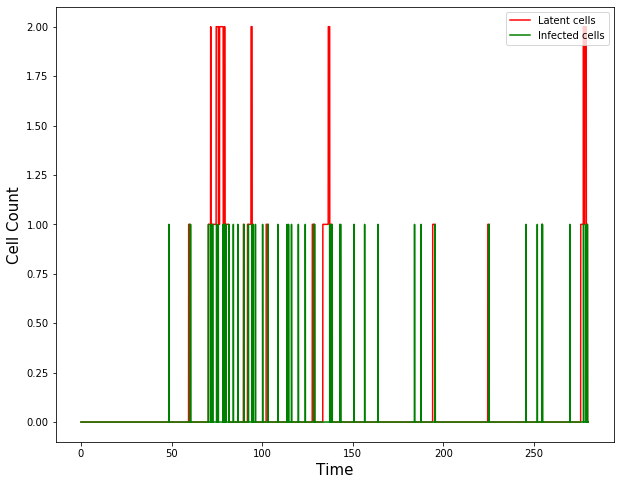

In [167]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(M1.times[:-1], M1.trajectory[:-1,1], 'r-', label='Latent cells')
plt.plot(M1.times[:-1], M1.trajectory[:-1,2], 'g-', label='Infected cells')
plt.xlabel('time',fontsize=15)
plt.ylabel('Cell count',fontsize=15)
plt.legend(loc='upper right')


#plt.yscale("symlog")
plt.xlabel("Time",fontsize=15)
plt.ylabel("Cell Count",fontsize=15)

Text(0, 0.5, 'Virus Count')

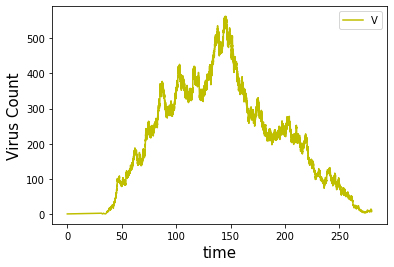

In [160]:
plt.plot(M1.times[:-1], M1.trajectory[:-1,3], 'y-', label='V')
plt.legend(loc='upper right')
plt.xlabel('time',fontsize=15)
plt.ylabel('Virus Count',fontsize=15)